In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
from collections import Counter
import datetime
import wordcloud
import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

# Simple Exploratory Data Analysis

In [2]:
df = pd.read_csv('youtube_statistics.csv', sep=';')

In [3]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15.0,920.0,81.0,2017-11-12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19.0,2232.0,58.0,2017-11-13
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14.0,482.0,58.0,2017-11-12
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23.0,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,False,False,This video showcases the difference between pe...,20.0,263.0,30.0,2017-11-12
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11.0,753.0,88.0,2017-11-13


## Numerical Approach

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37924 entries, 0 to 37923
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trending_date           37924 non-null  object 
 1   title                   37120 non-null  object 
 2   channel_title           37120 non-null  object 
 3   category_id             37120 non-null  float64
 4   publish_time            37120 non-null  object 
 5   tags                    36791 non-null  object 
 6   views                   36791 non-null  float64
 7   likes                   36791 non-null  float64
 8   dislikes                36791 non-null  float64
 9   comment_count           36791 non-null  float64
 10  comments_disabled       36791 non-null  object 
 11  ratings_disabled        36791 non-null  object 
 12  video_error_or_removed  36791 non-null  object 
 13  description             36791 non-null  object 
 14  No_tags                 36462 non-null

It can be seen that there are a total of 37924 data in the dataset. we also see a total of only one column whose data is complete i.e. column **trending_date** and the other 17 columns have incomplete data.

### Statistical Summary

In [5]:
describe= df.describe(include =['float64', 'int64', 'float', 'int'])
describe.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
category_id,37120.000000,22.040760,8.481936,1.000000,23.000000,24.000000,24.000000,100.000000
views,36791.000000,1071490.258976,3207149.048175,4024.000000,125604.000000,307836.000000,806631.500000,125432237.000000
likes,36791.000000,27450.693675,97831.294780,0.000000,879.000000,3126.000000,14095.000000,2912710.000000
dislikes,36791.000000,1685.363404,16197.316840,0.000000,109.000000,331.000000,1032.000000,1545017.000000
comment_count,36791.000000,2714.022043,14978.114328,0.000000,83.000000,336.000000,1314.500000,827755.000000
No_tags,36462.000000,18.962207,9.823926,1.000000,12.000000,19.000000,25.000000,72.000000
desc_len,36462.000000,922.744556,816.051836,3.000000,369.000000,677.000000,1232.000000,5136.000000
len_title,36462.000000,70.554605,22.451708,5.000000,53.000000,74.000000,91.000000,100.000000


notes that can be taken from the two tables above are:

- The average number of trending videos is 1,071,490. The median value for the number of views is 307,836 which means that half of trending videos have less than that number, and the other half have views greater than that number.
- The average number of **likes** of trending videos is 27,450, while the average number of dislikes is 1,685.  
- The number of **comment_count** averages 2,714 while the median is 336.  
- The number of **No_tags** averages 18 while the median is 19. 
- The number of **desc_len** averages 922 while the median is 677. 
- The number of **len_title** averages 70 while the median is 74.

from the above results can be seen that the distribution of data indicates abnormalities so it needs to be observed further.


In [6]:
df.describe(include=["O"])

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,37924,37120,37120,37120,36791,36791,36791,36791,36791,36462
unique,429,16466,1548,12494,12463,2,2,2,13992,219
top,\n,9,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17
freq,239,25,284,333,1120,35611,36034,36780,166,318


From the table above, we can see there are 429 unique dates, which means that our dataset contains data collected about trending videos over 429 days.

From the description **trending_date**, we can see that there are 37924 videos which correspond to our dataset containing 37924 entries. This table also tells us that the **channel_title** that appear most often are "VikatanTV" and **channel_title** it appears 284 times in the list of trending videos.
However there is something strange in the description table above: Since there are 6351 unique videos, we expect to have 6351 unique video titles as well, as we assume that each ID is linked to the corresponding title. One possible interpretation is that a trending video has multiple titles when it appears on the trend list, then reappears the other day but with a modified title. A similar explanation also applies to the description field. For column publish_time, the unique value is less than 6351, but there is nothing strange here, as two different videos may be published at the same time.

To verify our interpretation of the title column, then we try to see examples where trending videos appear more than once in a trending list but with different titles.

### Value Counting

In [7]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed','description','publish_date'] 
nums = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags','desc_len','len_title']

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom trending_date:
\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Missing Value Handling

In [8]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
title,804,2.120030
channel_title,804,2.120030
category_id,804,2.120030
publish_time,804,2.120030
tags,1133,2.987554
views,1133,2.987554
likes,1133,2.987554
dislikes,1133,2.987554
comment_count,1133,2.987554
comments_disabled,1133,2.987554


To remove nulls in columns of categorical data type, we decided to return empty strings to each column. this is done because the fields are indeed optional fields that can be filled in or not by the user.

In [9]:
dicariPalingSering = ['comments_disabled','ratings_disabled']
dihapus = ['video_error_or_removed','publish_time','publish_date','category_id']
diIsiKosong = ['title','channel_title','tags','description'] 
rata2 = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags','desc_len','len_title']

In [10]:
#diisi dengan Paling Sering
df['comments_disabled'] = df['comments_disabled'].fillna(df['comments_disabled'].mode()[0])
df['ratings_disabled'] = df['ratings_disabled'].fillna(df['ratings_disabled'].mode()[0])

In [11]:
#diisi kosong
df[diIsiKosong] = df[diIsiKosong].fillna(value="")

In [12]:
#diisi rata2
df['views'].fillna((df['views'].mean()), inplace=True)
df['likes'].fillna((df['likes'].mean()), inplace=True)
df['dislikes'].fillna((df['dislikes'].mean()), inplace=True)
df['No_tags'].fillna((df['No_tags'].mean()), inplace=True)
df['desc_len'].fillna((df['desc_len'].mean()), inplace=True)
df['len_title'].fillna((df['len_title'].mean()), inplace=True)
df['comment_count'].fillna((df['comment_count'].mean()), inplace=True)

In [13]:
#dihapus
df.dropna(how='any', inplace=True)

In [14]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


## Feature Engineering

### Publish Time to Proper Format

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36462 entries, 0 to 37923
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trending_date           36462 non-null  object 
 1   title                   36462 non-null  object 
 2   channel_title           36462 non-null  object 
 3   category_id             36462 non-null  float64
 4   publish_time            36462 non-null  object 
 5   tags                    36462 non-null  object 
 6   views                   36462 non-null  float64
 7   likes                   36462 non-null  float64
 8   dislikes                36462 non-null  float64
 9   comment_count           36462 non-null  float64
 10  comments_disabled       36462 non-null  bool   
 11  ratings_disabled        36462 non-null  bool   
 12  video_error_or_removed  36462 non-null  object 
 13  description             36462 non-null  object 
 14  No_tags                 36462 non-null

In [16]:
#Change the "trending_date" and "publish_time" to proper data format.
df["publish_time"]=pd.to_datetime(df["publish_time"],errors='coerce')

In [17]:
#Create some New columns which will help us to dig more into this data.
df["Publish_Hour"]=df["publish_time"].apply(lambda time:time.hour).astype(int)

In [18]:
df = df.drop(['publish_time'],axis=1)

In [19]:
df.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,Publish_Hour
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15.0,920.0,81.0,2017-11-12,12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19.0,2232.0,58.0,2017-11-13,5
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14.0,482.0,58.0,2017-11-12,15
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23.0,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,False,False,This video showcases the difference between pe...,20.0,263.0,30.0,2017-11-12,7
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11.0,753.0,88.0,2017-11-13,1


### Publish Date to Proper Format

In [20]:
#Change the "trending_date" and "publish_time" to proper data format.
df["publish_date"]=pd.to_datetime(df["publish_date"],errors='coerce')

In [21]:
#Create some New columns which will help us to dig more into this data.
df["publish_Year"]=df["publish_date"].apply(lambda time:time.year).astype(int)
df["publish_Month"]=df["publish_date"].apply(lambda time:time.month).astype(int)
df["publish_Day"]=df["publish_date"].apply(lambda time:time.day).astype(int)
df["publish_Day_of_Week"]=df["publish_date"].apply(lambda time:time.dayofweek).astype(int)

In [22]:
#New Data Frame Created But day of week in numeric format we need to convert it.astype(int)
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}#We're Using this Dictionary to Map our column
df["publish_Day_of_Week"]=df["publish_Day_of_Week"].map(dmap1)

### Trending Date to Proper Format

In [23]:
#Change the "trending_date" and "publish_time" to proper data format.
df["trending_date"]=pd.to_datetime(df["trending_date"],errors='coerce',format="%y.%d.%m")

In [24]:
#Create some New columns which will help us to dig more into this data.
df["Trending_Year"]=df["trending_date"].apply(lambda time:time.year).astype(int)
df["Trending_Month"]=df["trending_date"].apply(lambda time:time.month).astype(int)
df["Trending_Day"]=df["trending_date"].apply(lambda time:time.day).astype(int)
df["Trending_Day_of_Week"]=df["trending_date"].apply(lambda time:time.dayofweek).astype(int)

In [25]:
#New Data Frame Created But day of week in numeric format we need to convert it.astype(int)
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}#We're Using this Dictionary to Map our column
df["Trending_Day_of_Week"]=df["Trending_Day_of_Week"].map(dmap1)

### Addition of column 'Days before trend'

we will create new feature "days_before_trend" to representing the time (in days) between publication and the day when it became trending.

In [26]:
df["days_before_trend"] = (df.trending_date - df.publish_date) / np.timedelta64(1, 'D')
df["days_before_trend"] = df["days_before_trend"].astype(int)
df.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,...,Publish_Hour,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,days_before_trend
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,...,12,2017,11,12,Sun,2017,11,14,Tue,2
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,...,5,2017,11,13,Mon,2017,11,14,Tue,1
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,...,15,2017,11,12,Sun,2017,11,14,Tue,2
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23.0,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,...,7,2017,11,12,Sun,2017,11,14,Tue,2
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,...,1,2017,11,13,Mon,2017,11,14,Tue,1


### Addition of column 'Views per day'

In [27]:
df.loc[(df['days_before_trend'] < 1), 'days_before_trend'] = 1
df["views_per_day"] = df["views"].astype(int) / df["days_before_trend"]
df["views_per_day"] = df["views_per_day"]
df.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,...,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,days_before_trend,views_per_day
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,...,2017,11,12,Sun,2017,11,14,Tue,2,548163.5
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,...,2017,11,13,Mon,2017,11,14,Tue,1,590101.0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,...,2017,11,12,Sun,2017,11,14,Tue,2,236994.0
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23.0,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,...,2017,11,12,Sun,2017,11,14,Tue,2,621340.0
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,...,2017,11,13,Mon,2017,11,14,Tue,1,464015.0


### Import the Data From Json File To Get Our Categories  

In [28]:
category_df = pd.read_json('IN_category_id.json')

# Fetching id and titles from the category dataset
list_id =[]
list_title = []

for index,row in category_df.iterrows():
    x = row['items']
    list_id.append(x['id'])
    list_title.append(x['snippet']['title'])
    
# Creating dataframe of id and title

category_df = pd.DataFrame(zip(list_id,list_title),columns=['category_id','Category'])
category_df['category_id'] = category_df['category_id'].astype('int64')
df = pd.merge(df, category_df, on='category_id',how='inner')
df.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,...,publish_Month,publish_Day,publish_Day_of_Week,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,days_before_trend,views_per_day,Category
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,...,11,12,Sun,2017,11,14,Tue,2,5.481635e+05,Film & Animation
1,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1.0,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754.0,829362.0,61195.0,101117.0,False,...,11,7,Tue,2017,11,14,Tue,7,5.126536e+06,Film & Animation
2,2017-11-14,Punyalan Private Limited Official Teaser 2 | J...,DREAMS N BEYOND,1.0,"dreams n beyond|""dreamsnbeyond""|""ranjith shank...",249423.0,7861.0,68.0,364.0,False,...,11,12,Sun,2017,11,14,Tue,2,1.247115e+05,Film & Animation
3,2017-11-14,Aruvi - Official Teaser | Arun Prabu | Bindhu ...,Dream Warrior Pictures,1.0,"Aruvi|""Aruvi Tamil Movie""|""Aruvi Movie""|""Aruvi...",696515.0,12397.0,449.0,385.0,False,...,11,9,Thu,2017,11,14,Tue,5,1.393030e+05,Film & Animation
4,2017-11-14,"engagement काका कुमाणसी का सगाई में भिजोल ,राज...",Murari Ki Kocktail,1.0,rajasthani comedy marwari comedy hariyani come...,269593.0,3931.0,390.0,640.0,False,...,11,11,Sat,2017,11,14,Tue,3,8.986433e+04,Film & Animation


### Positive and Negative Imporession base on likes and dislikes

In [29]:
like_percent = pd.DataFrame((df['likes'] / df['views']) * 100)
dislike_percent = pd.DataFrame((df['dislikes'] / df['views']) * 100)
df['like_percent'] = like_percent
df['dislike_percent'] = dislike_percent

df['positive_or_negative'] = df['like_percent'] > df['dislike_percent']

In [30]:
# comparing the likes to dislikes 
video_feel = []
for item in df['positive_or_negative']:
    if item == True:
        video_feel.append(1)
    else:
        video_feel.append(0)
        
df['positive_or_negative'] = video_feel
df.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,comments_disabled,...,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,days_before_trend,views_per_day,Category,like_percent,dislike_percent,positive_or_negative
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,...,2017,11,14,Tue,2,5.481635e+05,Film & Animation,3.098163,0.072789,1
1,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1.0,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754.0,829362.0,61195.0,101117.0,False,...,2017,11,14,Tue,7,5.126536e+06,Film & Animation,2.311118,0.170527,1
2,2017-11-14,Punyalan Private Limited Official Teaser 2 | J...,DREAMS N BEYOND,1.0,"dreams n beyond|""dreamsnbeyond""|""ranjith shank...",249423.0,7861.0,68.0,364.0,False,...,2017,11,14,Tue,2,1.247115e+05,Film & Animation,3.151674,0.027263,1
3,2017-11-14,Aruvi - Official Teaser | Arun Prabu | Bindhu ...,Dream Warrior Pictures,1.0,"Aruvi|""Aruvi Tamil Movie""|""Aruvi Movie""|""Aruvi...",696515.0,12397.0,449.0,385.0,False,...,2017,11,14,Tue,5,1.393030e+05,Film & Animation,1.779861,0.064464,1
4,2017-11-14,"engagement काका कुमाणसी का सगाई में भिजोल ,राज...",Murari Ki Kocktail,1.0,rajasthani comedy marwari comedy hariyani come...,269593.0,3931.0,390.0,640.0,False,...,2017,11,14,Tue,3,8.986433e+04,Film & Animation,1.458124,0.144663,1


### Change The Data-Format Of Following Fields To Int Type

In [31]:
#Lets change the data-format of following fields to int type, which will be easy to use.
list1=["views", "likes", "dislikes", "comment_count".split()] 
for column in list1:
    df[column]=df[column].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36357 entries, 0 to 36356
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36357 non-null  datetime64[ns]
 1   title                   36357 non-null  object        
 2   channel_title           36357 non-null  object        
 3   category_id             36357 non-null  float64       
 4   tags                    36357 non-null  object        
 5   views                   36357 non-null  int32         
 6   likes                   36357 non-null  int32         
 7   dislikes                36357 non-null  int32         
 8   comment_count           36357 non-null  int32         
 9   comments_disabled       36357 non-null  bool          
 10  ratings_disabled        36357 non-null  bool          
 11  video_error_or_removed  36357 non-null  object        
 12  description             36357 non-null  object

## Graphic Approach

### Dataset collection years

No handles with labels found to put in legend.


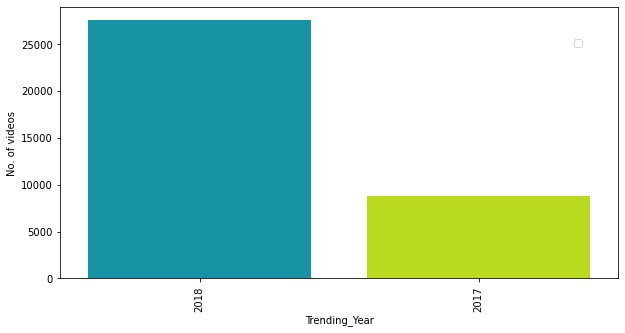

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="Trending_Year", data=df, palette="nipy_spectral",
              order=df.Trending_Year.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Trending_Year", ylabel="No. of videos")
plt.legend(bbox_to_anchor=(0.945, 0.90))

when we try to see what year this data is collected we find that in 2018 is the year in which many videos are published on youtube with a total of more than 25,000 videos. while in 2017 fewer than 10,000 videos.

### Correlation Heatmap

Now how to correlate between data variables. Correlation is represented as a value between -1 and +1 where +1 indicates the highest positive correlation, -1 indicates the highest negative correlation, and 0 indicates no correlation.

In [34]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,No_tags,desc_len,len_title,...,publish_Month,publish_Day,Trending_Year,Trending_Month,Trending_Day,days_before_trend,views_per_day,like_percent,dislike_percent,positive_or_negative
category_id,1.000000,-0.181247,-0.125720,-0.041780,-0.034488,0.028826,0.053501,0.002205,-0.150769,-0.164077,...,0.012658,0.009155,-0.027857,0.019483,0.001903,-0.076393,-0.194228,-0.012029,0.034553,-0.073956
views,-0.181247,1.000000,0.850150,0.543645,0.674152,-0.032382,-0.033400,0.053594,0.123745,-0.052362,...,-0.009678,0.000927,0.032314,-0.007625,-0.009671,0.189927,0.815326,0.039994,0.019607,0.044781
likes,-0.125720,0.850150,1.000000,0.494503,0.780324,-0.044564,-0.040096,0.018139,0.065858,-0.171013,...,-0.007668,0.007403,0.030226,-0.007064,-0.007173,0.148284,0.741792,0.258355,0.089192,0.054658
dislikes,-0.041780,0.543645,0.494503,1.000000,0.708119,-0.011208,-0.014865,0.033719,0.035263,-0.030387,...,0.013455,-0.013454,-0.005151,0.013806,-0.009693,0.059988,0.431628,0.040445,0.155824,0.011332
comment_count,-0.034488,0.674152,0.780324,0.708119,1.000000,-0.032160,-0.023695,0.019261,0.032138,-0.119655,...,0.008728,-0.005289,0.006770,0.010539,-0.010143,0.083663,0.589626,0.240003,0.123929,0.032020
comments_disabled,0.028826,-0.032382,-0.044564,-0.011208,-0.032160,1.000000,0.333519,-0.070091,-0.055797,0.087621,...,-0.017375,0.005078,-0.012976,-0.014731,-0.005673,0.001738,-0.036761,-0.110424,-0.020968,-0.366348
ratings_disabled,0.053501,-0.033400,-0.040096,-0.014865,-0.023695,0.333519,1.000000,-0.086670,-0.062715,0.050874,...,-0.018934,-0.001191,0.001299,-0.015985,-0.006750,-0.014663,-0.037977,-0.110411,-0.114512,-0.721626
No_tags,0.002205,0.053594,0.018139,0.033719,0.019261,-0.070091,-0.086670,1.000000,0.185593,0.040173,...,-0.013195,-0.012596,0.027918,-0.011315,-0.008362,0.013312,0.066510,0.067357,0.028402,0.085931
desc_len,-0.150769,0.123745,0.065858,0.035263,0.032138,-0.055797,-0.062715,0.185593,1.000000,0.160374,...,-0.040370,0.002261,0.069428,-0.043907,0.003087,0.004672,0.142424,0.053381,-0.015107,0.079460
len_title,-0.164077,-0.052362,-0.171013,-0.030387,-0.119655,0.087621,0.050874,0.040173,0.160374,1.000000,...,0.003066,0.022774,-0.044893,0.000698,0.015574,0.012947,-0.072759,-0.282846,-0.113805,-0.070586


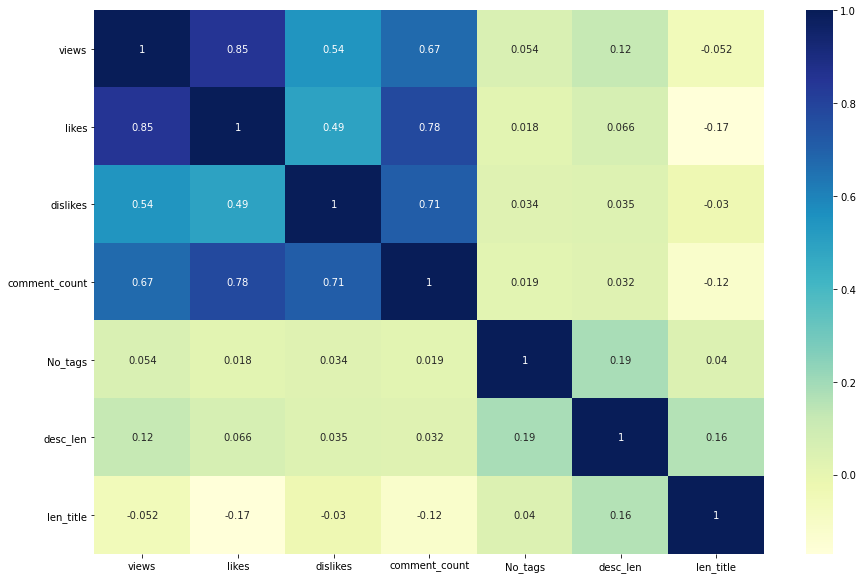

In [35]:
features = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags','desc_len','len_title']

plt.figure(figsize=(15,10))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5,top - 0.5)

we found that **'views'** and **'likes'** were positively correlated with a correlation value of 0.85; we also see a high positive correlation (0.78) between the number of **'likes'** and **'comment_count'**, and between **'dislikes'** and **'comment_count'** (0.71).  There is some positive correlation between **'views'** and **'dislikes'**, between **'views'** and **'comment_count'**, between **'likes'** and **'dislikes'**.

looks like people have commented more when they like the videos :)

### Scatter Plot

based on the correlation table above which says that **'views'** and **'likes'** are very positively correlated. then we then verify that by plotting a scatter plot between **'views'** and **'likes'** to visualize the relationship between those variables.

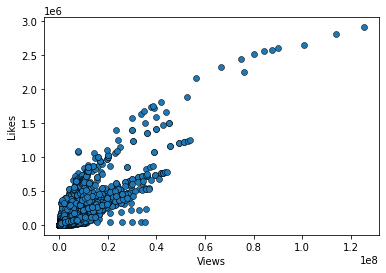

In [36]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that **'views'** and **'likes'** are really positively correlated whereas when one increases, the other also increases—mostly.

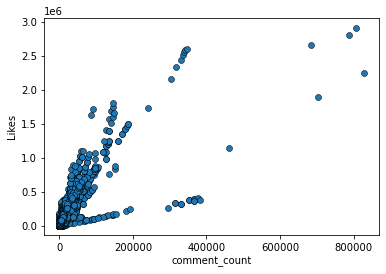

In [37]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['comment_count'], y=df['likes'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="comment_count", ylabel="Likes")

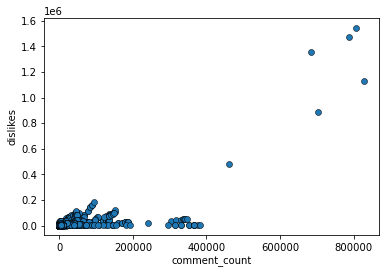

In [38]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['comment_count'], y=df['dislikes'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="comment_count", ylabel="dislikes")

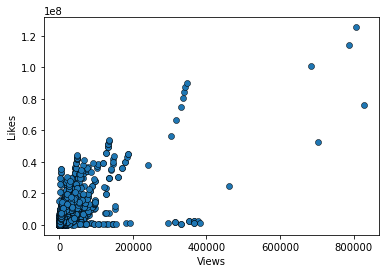

In [39]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['comment_count'], y=df['views'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

### Best Time to Publish Video

No handles with labels found to put in legend.


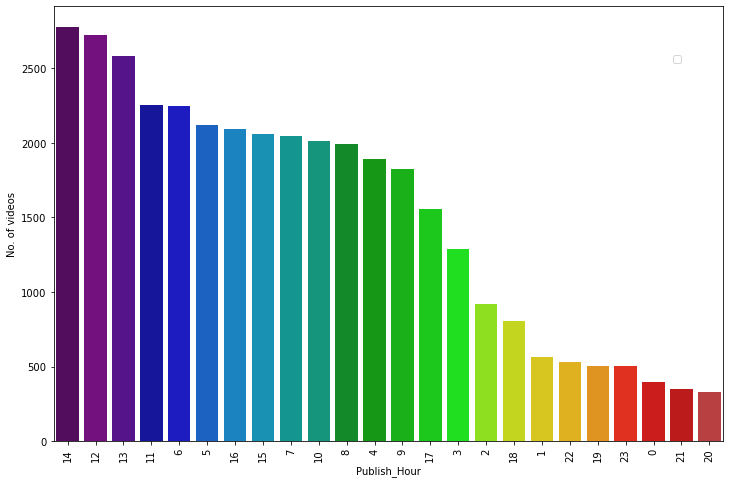

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="Publish_Hour", data=df, palette="nipy_spectral",
              order=df.Publish_Hour.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Publish_Hour", ylabel="No. of videos")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Best Day for Tranding Video

No handles with labels found to put in legend.


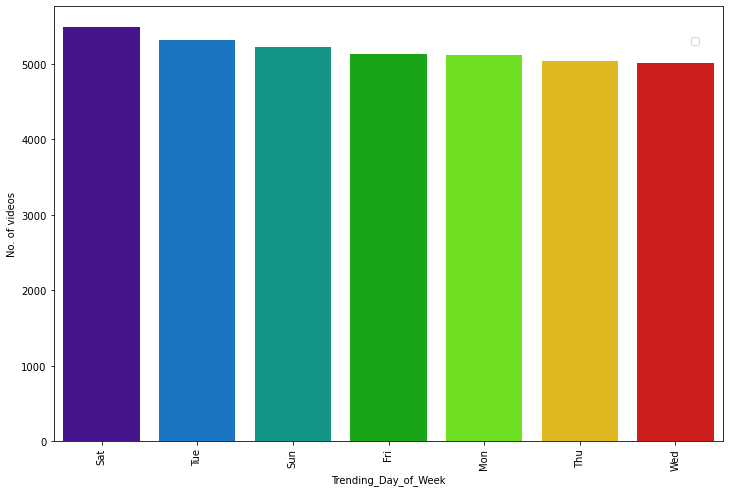

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="Trending_Day_of_Week", data=df, palette="nipy_spectral",
              order=df.Trending_Day_of_Week.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Trending_Day_of_Week", ylabel="No. of videos")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36357 entries, 0 to 36356
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36357 non-null  datetime64[ns]
 1   title                   36357 non-null  object        
 2   channel_title           36357 non-null  object        
 3   category_id             36357 non-null  float64       
 4   tags                    36357 non-null  object        
 5   views                   36357 non-null  int32         
 6   likes                   36357 non-null  int32         
 7   dislikes                36357 non-null  int32         
 8   comment_count           36357 non-null  int32         
 9   comments_disabled       36357 non-null  bool          
 10  ratings_disabled        36357 non-null  bool          
 11  video_error_or_removed  36357 non-null  object        
 12  description             36357 non-null  object

### The Association of the Viewing Time of the video Category

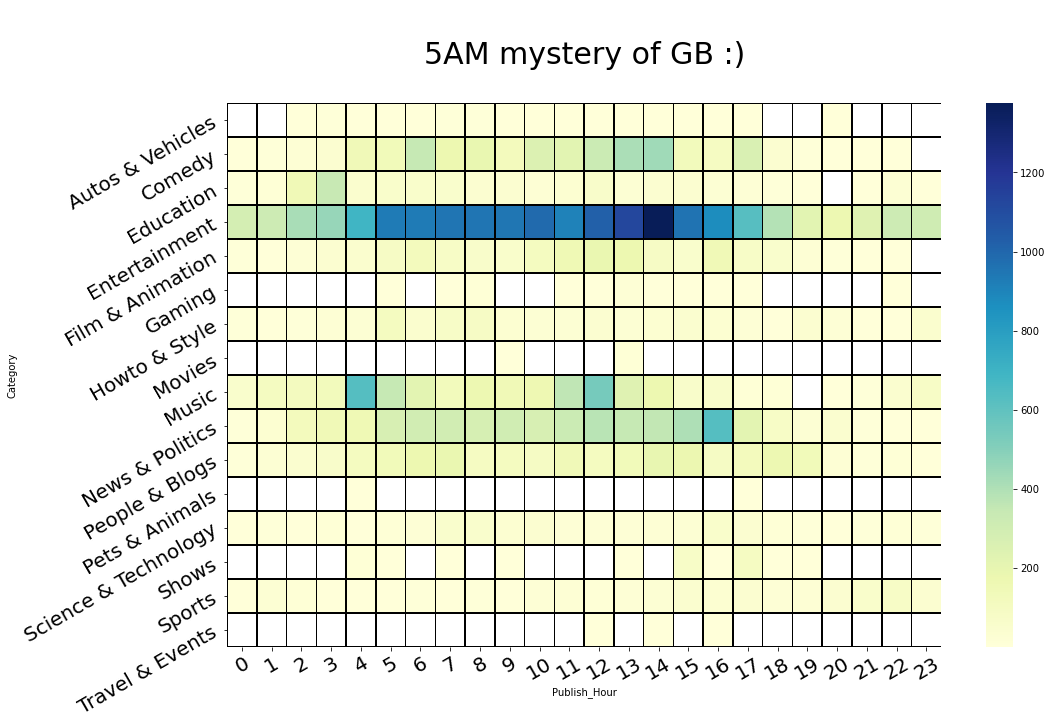

In [43]:
plt.figure(figsize=(16,10))#You can Arrange The Size As Per Requirement
list5=df.groupby(["Category","Publish_Hour"]).count()["publish_date"].unstack()
ax = sb.heatmap(list5, cmap='YlGnBu', linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=20) 
plt.title("\n5AM mystery of GB :)\n", fontsize=30)
plt.show()

### The Best Videos Viewed on Youtube

In [44]:
def best_videos(list, title):  
    #df_temp = df[["title","views"]].sort_values(by="views",ascending=True).drop_duplicates("title",keep="last")
    list.sort_values(by="views",ascending=False).set_index("title").head(25).plot.bar(figsize=(16,10))
    plt.yticks(rotation=60, fontsize=25) 
    plt.xticks(rotation=90, fontsize=20) 
    plt.title(title, fontsize=25)
    plt.legend(handlelength=5, fontsize  = 30)
    plt.show()

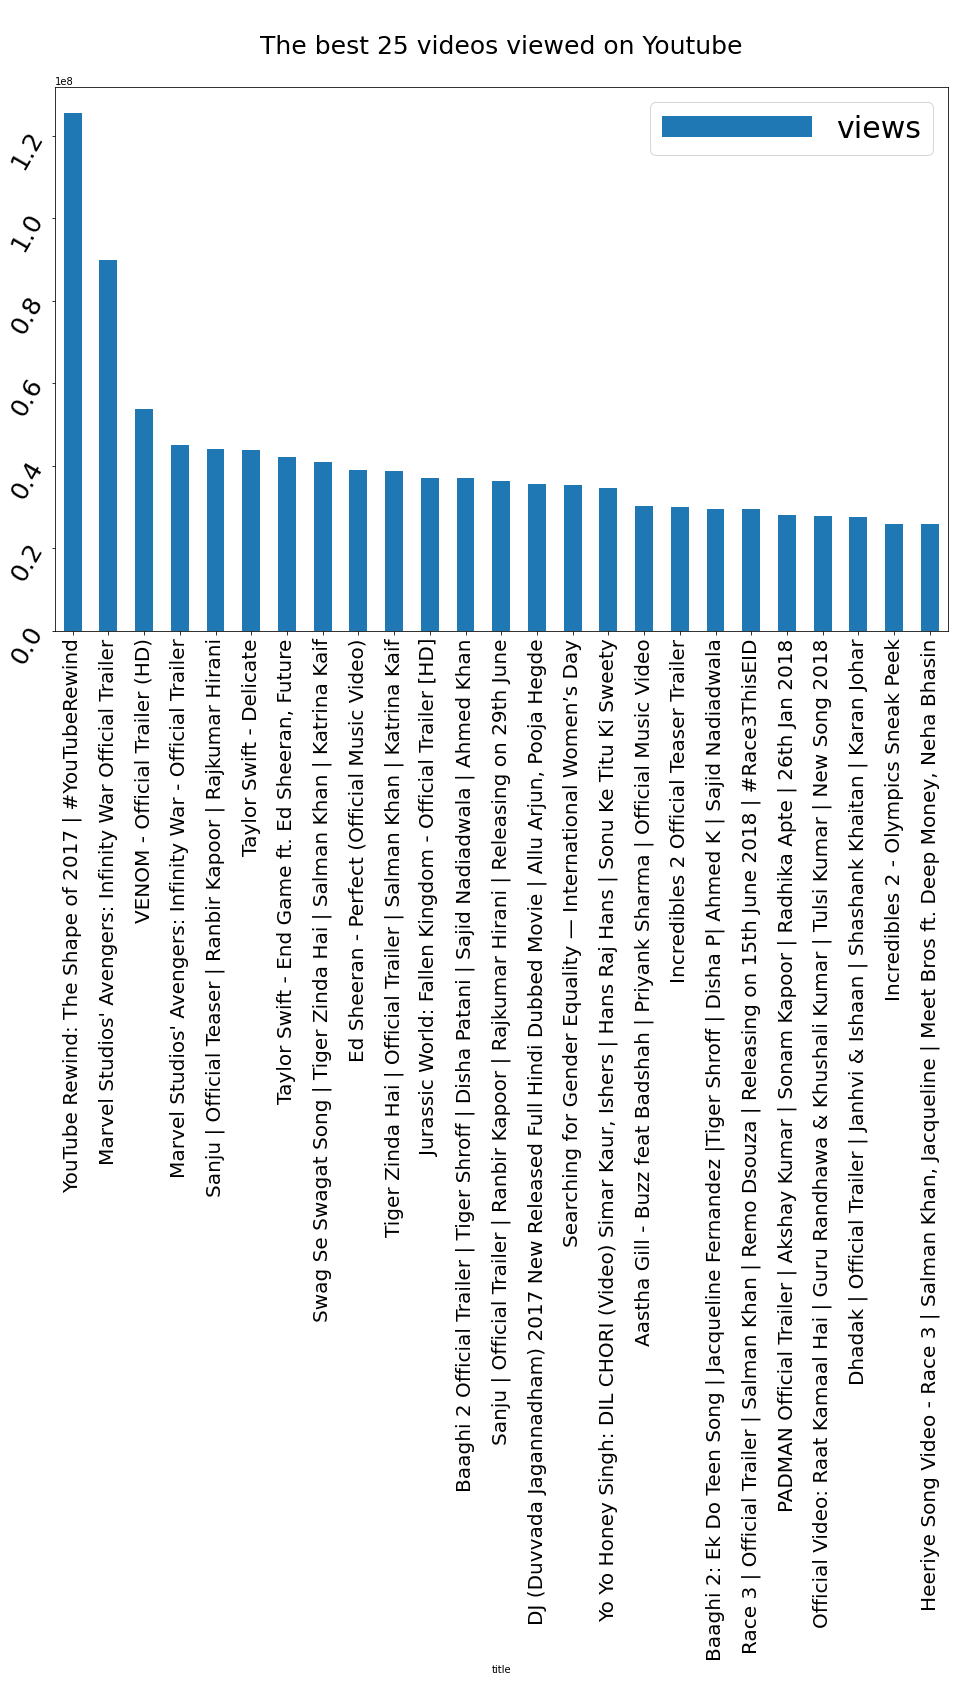

In [45]:
list = df[["title","views"]].sort_values(by="views",ascending=True).drop_duplicates("title",keep="last")
title = "\nThe best 25 videos viewed on Youtube\n"
best_videos(list, title)

### Which Video Category Has The Largest Number Of Trending Videos

No handles with labels found to put in legend.


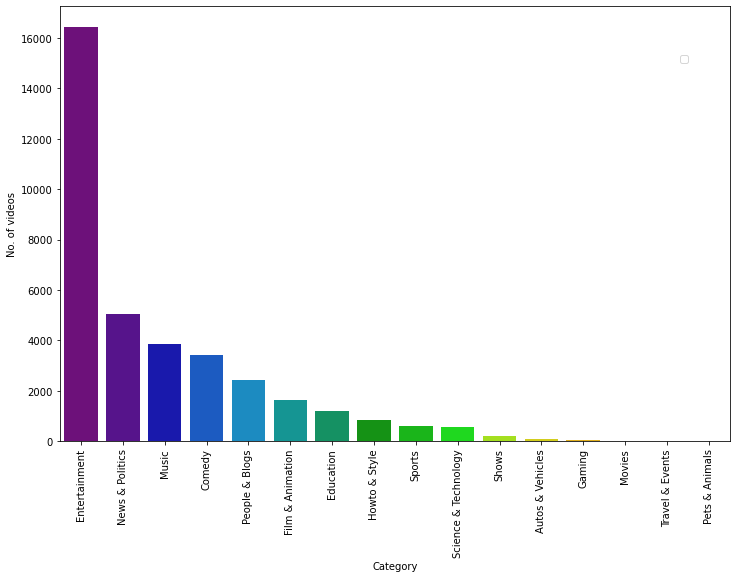

In [46]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="Category", data=df, palette="nipy_spectral",
              order=df.Category.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### The best 25  'Entertaintment'  videos viewed on Youtube

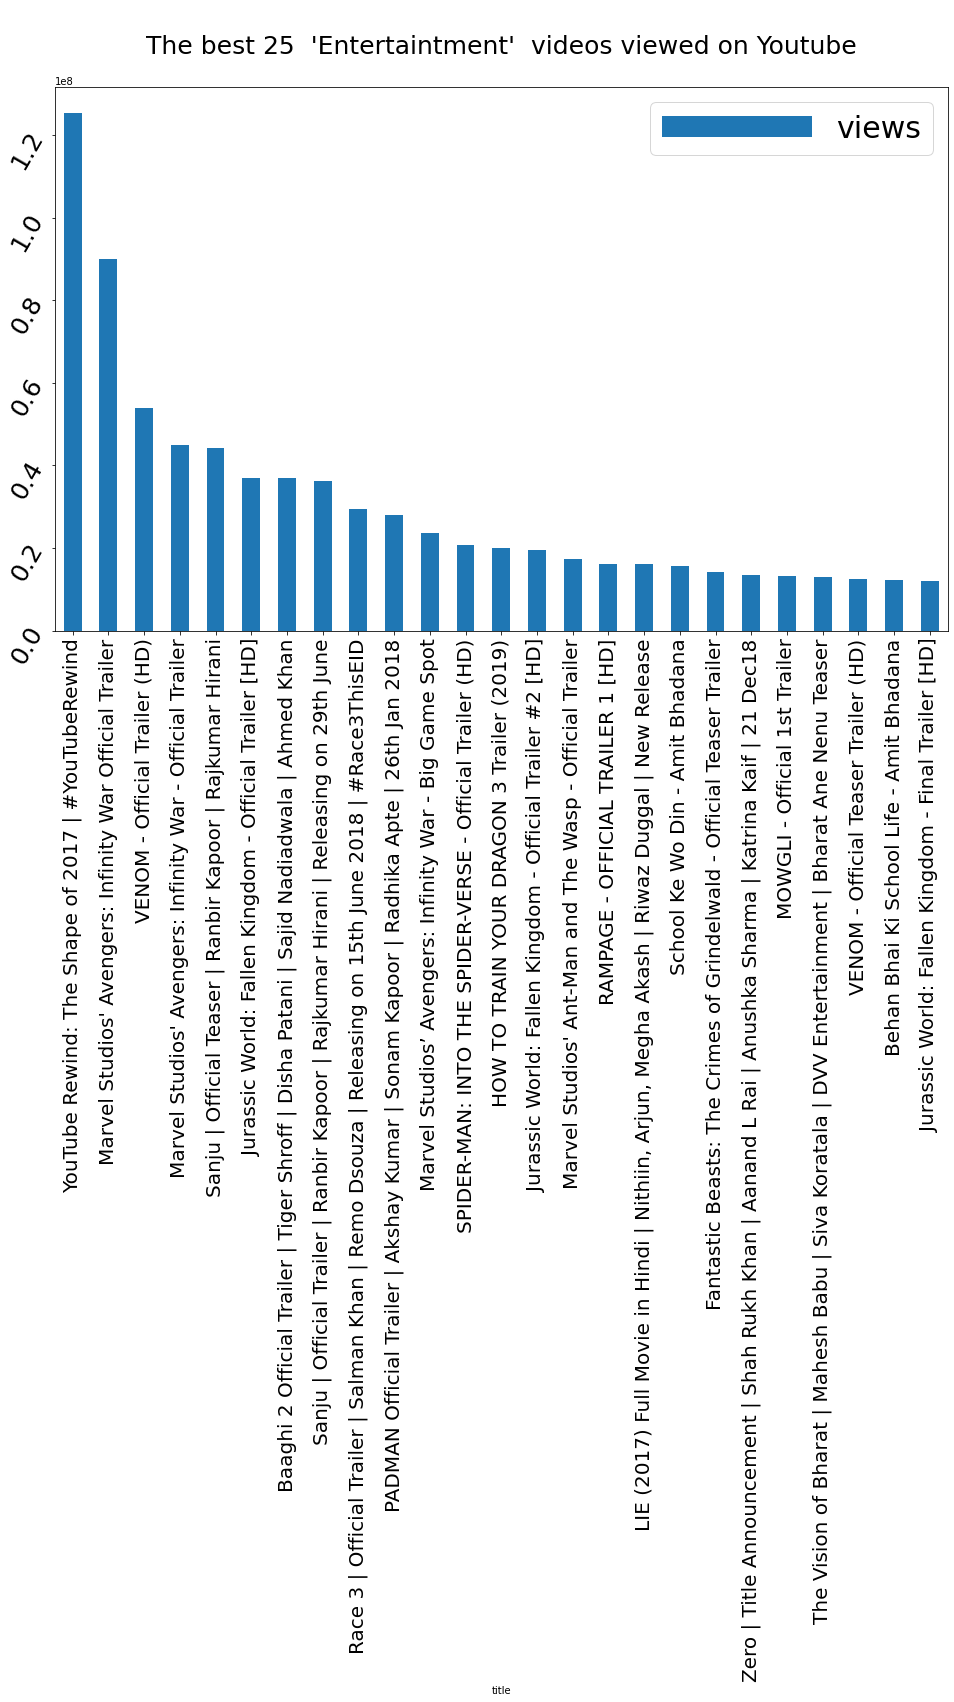

In [47]:
list = df[["title","views"]][df["Category"] == "Entertainment"].sort_values(by="views",ascending=True).\
drop_duplicates("title",keep="last")
title = "\nThe best 25  'Entertaintment'  videos viewed on Youtube\n"
best_videos(list, title)

### The best 25  'Music'  videos viewed on Youtube

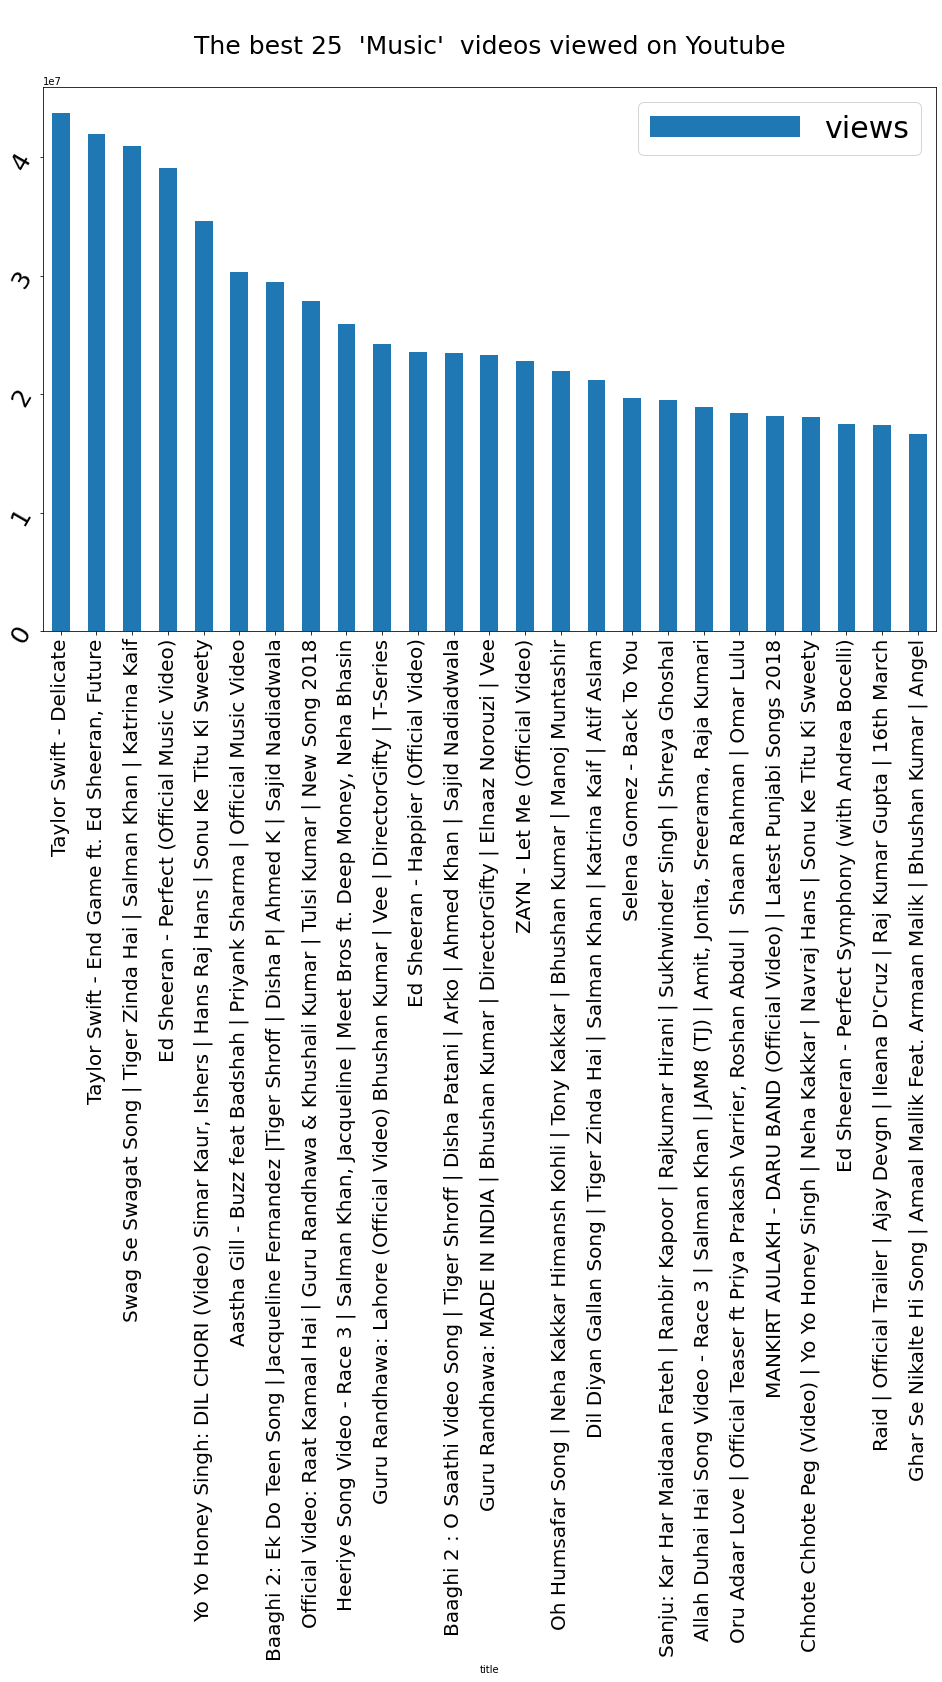

In [48]:
list = df[["title","views"]][df["Category"] == "Music"].sort_values(by="views",ascending=True).\
drop_duplicates("title",keep="last")
title = "\nThe best 25  'Music'  videos viewed on Youtube\n"
best_videos(list, title)

### How Many Trending Video Titles Contain Capitalized Word

In [49]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

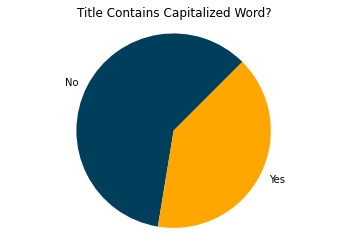

In [50]:
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

### Which Channels Have The Largest Number Of Trending Videos?

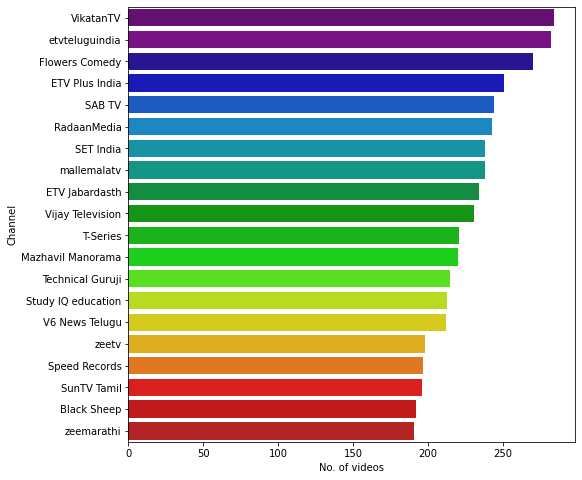

In [51]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette="nipy_spectral", ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

### Which Channels Having Most Number Of Trending Videos Per Category

In [52]:
# Creating a df of num_of trending videos per channel 
trending_channels = df.groupby(['Category','channel_title']).size().rename('num_videos').reset_index()

# Picking out the channel with the highest number of trending videos in each category
most_trending = trending_channels[trending_channels.groupby('Category')['num_videos'].transform(max) == trending_channels['num_videos']]

most_trending

,Category,channel_title,num_videos
1,Autos & Vehicles,Autocar India,17
39,Comedy,ETV Plus India,251
148,Education,Study IQ education,213
769,Entertainment,etvteluguindia,282
821,Film & Animation,Goldmines Telefilms,114
894,Gaming,Clash of Clans,29
898,Howto & Style,5-Minute Crafts,173
941,Movies,Rhythm Boyz,14
1060,Music,T-Series,221
1313,News & Politics,V6 News Telugu,212


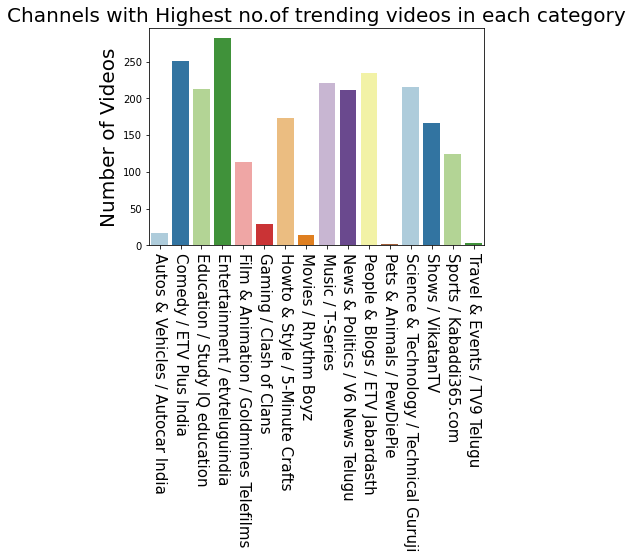

In [53]:
px.bar(data_frame=most_trending, 
           x='channel_title', y='num_videos',
           template='ggplot2',
           title='Channels with Highest no.of trending videos in each category')


fig = sns.barplot(data=most_trending, x='channel_title', y='num_videos', palette='Paired')
xlabels = (most_trending['Category']+' / '+most_trending['channel_title']).to_list()
_ = plt.title('Channels with Highest no.of trending videos in each category', fontsize=20)
_ = plt.ylabel('Number of Videos', fontsize=20)
_ = plt.xlabel('')
_ = plt.xticks(np.arange(0,16),xlabels,rotation=270, fontsize=15)

### Video Title Lengths

C:\Users\mfmoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



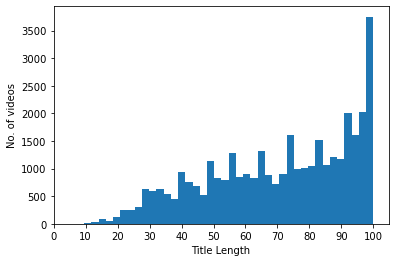

In [54]:
fig, ax = plt.subplots()
_ = sns.distplot(df["len_title"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

### How Many Trending Videos Have Their Commets Disabled

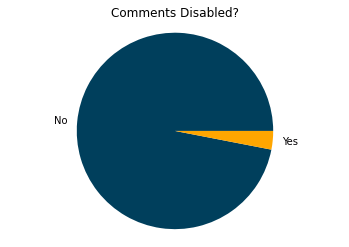

In [55]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [56]:
df["comments_disabled"].value_counts(normalize=True)

False    0.969469
True     0.030531
Name: comments_disabled, dtype: float64

### How Many Trending Videos Have Their Ratings Disabled

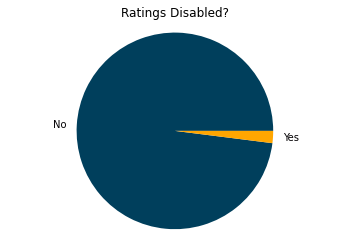

In [57]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [58]:
df["ratings_disabled"].value_counts()

False    35631
True       726
Name: ratings_disabled, dtype: int64

### How Many Videos Have Both Comments And Ratings Disabled?

In [59]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

314

### Late bloomers

videos that waited the longest before they became trending

In [60]:
max_title_length = 20
number_of_late_bloomers = 15
df["days_before_trend"]= df["days_before_trend"].astype(float)
late_bloomers = df.sort_values(["days_before_trend"], ascending=False).head(number_of_late_bloomers)
late_bloomers_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
late_bloomers_days = late_bloomers.days_before_trend.values
late_bloomers_views = late_bloomers.views.values

trace1 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_days,
    name='Number of days',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_views,
    name='total views',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    ),
    yaxis='y2'
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Late bloomers',
    width=900,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of days until becoming trending',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Total number of views',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 61000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\mfmoh\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### Videos That Has Gained Popularity on Youtube by being Disliked

In [61]:
max_title_length = 20
number_of_late_bloomers = 10
df["dislikes"]= df["dislikes"]
df['dislike_percentage'] = df['dislikes'] / (df['dislikes'] + df['likes'])
most_disliked = df.sort_values(["dislikes"], ascending=False).head(number_of_late_bloomers)
most_disliked_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
most_disliked_l_number = most_disliked.likes.values
most_disliked_dl_number = most_disliked.dislikes.values
most_disliked_dl_percentage = most_disliked.dislike_percentage.values

trace1 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_l_number,
    name='Number of likes',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_dl_number,
    name='Number of dislikes',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = most_disliked_title,
    y = most_disliked_dl_percentage,
    name='Dislike percentage',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
        size=15
    ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'No such thing as bad press, right?',
    width=900,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of likes/dislikes',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Dislike percentage',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 0.165
    ),
    legend=dict(x=0.75, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Tags wordcloud

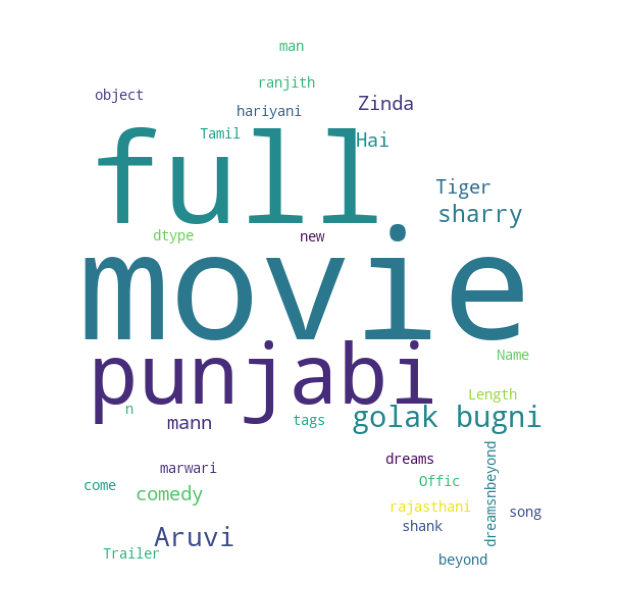

In [62]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(df["tags"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

### Tittle wordcloud

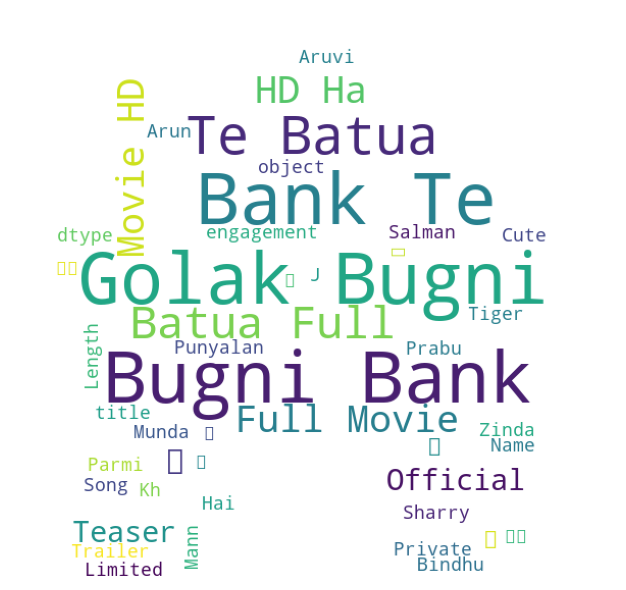

In [63]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(df["title"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

# Data Preprocessing

## Duplicate Values

In [64]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 

Duplicate Rows :


## Outliers

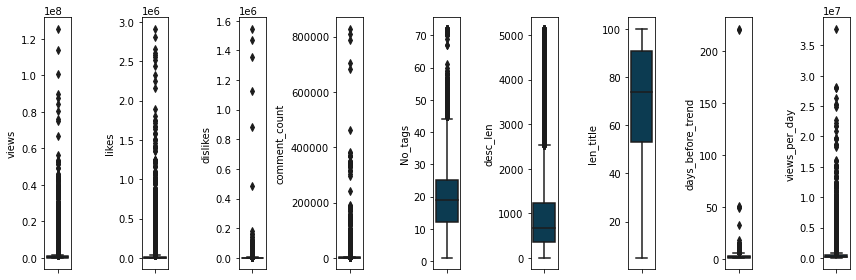

In [65]:
outlierhandlings = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags','desc_len','len_title','days_before_trend', 'views_per_day']

plt.figure(figsize=(12, 4))
for i in range(0, len(outlierhandlings)):
    plt.subplot(1, len(outlierhandlings), i+1)
    sns.boxplot(y=df[outlierhandlings[i]], color='#003f5c', orient='v')
    plt.tight_layout()

## Log-transformation 

In [66]:
df["views"] = np.log1p(df["views"])
df["likes"] = np.log1p(df["likes"])
df["dislikes"] = np.log1p(df["dislikes"])
df["comment_count"] = np.log1p(df["comment_count"])
df["No_tags"] = np.log1p(df["No_tags"])
df["desc_len"] = np.log1p(df["desc_len"])
df["days_before_trend"] = np.log1p(df["days_before_trend"])
df["views_per_day"] = np.log1p(df["views_per_day"])

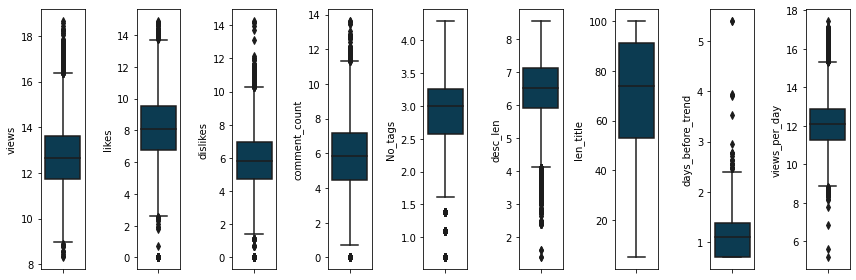

In [67]:
plt.figure(figsize=(12, 4))
for i in range(0, len(outlierhandlings)):
    plt.subplot(1, len(outlierhandlings), i+1)
    sns.boxplot(y=df[outlierhandlings[i]], color='#003f5c', orient='v')
    plt.tight_layout()

## Normalization/Standardization

In [68]:
#scaling - z score

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36357 entries, 0 to 36356
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36357 non-null  datetime64[ns]
 1   title                   36357 non-null  object        
 2   channel_title           36357 non-null  object        
 3   category_id             36357 non-null  float64       
 4   tags                    36357 non-null  object        
 5   views                   36357 non-null  float64       
 6   likes                   36357 non-null  float64       
 7   dislikes                36357 non-null  float64       
 8   comment_count           36357 non-null  float64       
 9   comments_disabled       36357 non-null  bool          
 10  ratings_disabled        36357 non-null  bool          
 11  video_error_or_removed  36357 non-null  object        
 12  description             36357 non-null  object

## Feature encoding

## Class imbalance

# Modeling

<AxesSubplot:>

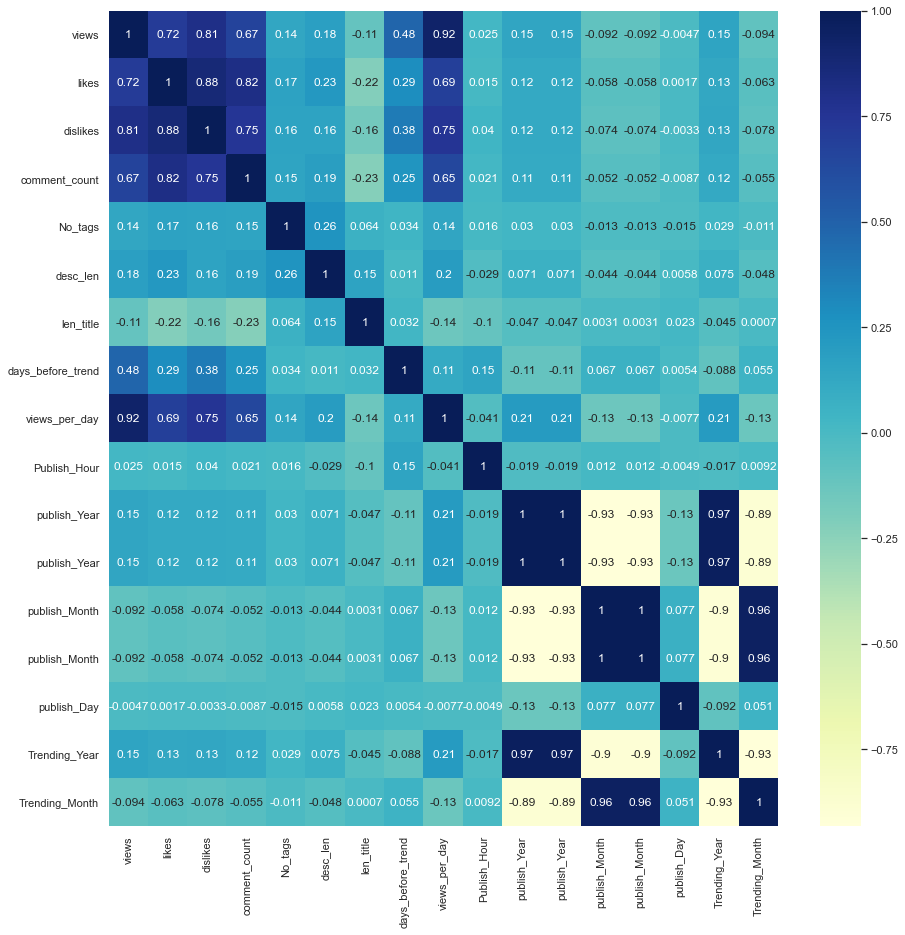

In [70]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count', 'No_tags','desc_len','len_title','days_before_trend', 'views_per_day','Publish_Hour','publish_Year','publish_Year','publish_Month','publish_Month','publish_Day','Trending_Year','Trending_Month']
].corr(), cmap='YlGnBu', annot=True)

In [71]:
X = df[['likes', 'dislikes', 'comment_count', 'days_before_trend','views_per_day']] # menggunakan semua feature kecuali target
# x = df[['']] # hanya menggunakan 1 feature saja
y = df['views']

In [72]:
X

,likes,dislikes,comment_count,days_before_trend,views_per_day
0,10.433145,6.683361,6.783325,1.098612,13.214331
1,13.628413,11.021837,11.524043,2.079442,15.449941
2,8.969796,4.234107,5.899897,1.098612,11.733766
3,9.425290,6.109248,5.955837,1.791759,11.844414
4,8.276903,5.968708,6.463029,1.386294,11.406068
...,...,...,...,...,...
36352,11.004580,8.058644,8.143808,1.609438,13.963619
36353,11.115919,8.238801,8.256348,1.791759,13.939845
36354,11.115919,8.238801,8.256348,1.791759,13.939845
36355,11.229594,8.419580,8.361708,1.945910,13.956585


In [73]:
y

0        13.907477
1        17.395851
2        12.426910
3        13.453846
4        12.504672
           ...    
36352    15.349912
36353    15.549282
36354    15.549282
36355    15.748344
36356    15.816809
Name: views, Length: 36357, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
print(f'Xtrain: {X_train.shape}')
print(f'Ytrain: {y_train.shape}')
print(f'Xtest: {X_test.shape}')
print(f'YTest: {y_test.shape}')

Xtrain: (25449, 5)
Ytrain: (25449,)
Xtest: (10908, 5)
YTest: (10908,)


## LinearRegression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Accuracy on Traing set   : ",regressor.score(X_train,y_train))
print("Accuracy on Testing set  : ",regressor.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9988682250253518
Accuracy on Testing set  :  0.9990086110511399
__________________________________________
		Error Table
Mean Absolute Error      :  0.0379513254473739
Mean Squared  Error      :  0.0019889639204529923
Root Mean Squared Error  :  0.0445978017446263
R Squared Error          :  0.9990086110511399


## Ridge

In [77]:
from sklearn.linear_model import Ridge
from sklearn import metrics

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print("Accuracy on Traing set   : ",ridge_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",ridge_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9988682025962029
Accuracy on Testing set  :  0.9990081770609294
__________________________________________
		Error Table
Mean Absolute Error      :  0.038014924075467714
Mean Squared  Error      :  0.0019898346088658603
Root Mean Squared Error  :  0.04460756223854718
R Squared Error          :  0.9990081770609294


## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy on Traing set   : ",dt.score(X_train,y_train))
print("Accuracy on Testing set  : ",dt.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9996848119580577
__________________________________________
		Error Table
Mean Absolute Error      :  0.0028802105207276054
Mean Squared  Error      :  0.0006323427795944022
Root Mean Squared Error  :  0.025146426775874187
R Squared Error          :  0.9996848119580577


## Lasso

In [79]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print("Accuracy on Traing set   : ",lasso_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",lasso_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.5396129690085658
Accuracy on Testing set  :  0.541102512702742
__________________________________________
		Error Table
Mean Absolute Error      :  0.7571054594255165
Mean Squared  Error      :  0.9206583818290601
Root Mean Squared Error  :  0.9595094485355838
R Squared Error          :  0.541102512702742


## Support Vector Regressor

In [80]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("Accuracy on Traing set   : ",svr.score(X_train,y_train))
print("Accuracy on Testing set  : ",svr.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9980736821514373
Accuracy on Testing set  :  0.9981173974069135
__________________________________________
		Error Table
Mean Absolute Error      :  0.054507543854106416
Mean Squared  Error      :  0.003776952162423714
Root Mean Squared Error  :  0.06145691305641469
R Squared Error          :  0.9981173974069135


## LGBM 

In [81]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

lgb_model = LGBMRegressor()

lgb_model.fit(X_train, y_train)
y_pred= lgb_model.predict(X_test)

print("Accuracy on Traing set   : ",lgb_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",lgb_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9996289509366868
Accuracy on Testing set  :  0.9994697842251357
__________________________________________
		Error Table
Mean Absolute Error      :  0.014821663576029522
Mean Squared  Error      :  0.001063739965502688
Root Mean Squared Error  :  0.032615026682538344
R Squared Error          :  0.9994697842251357


## Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=True)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy on Traing set   : ",rf.score(X_train,y_train))
print("Accuracy on Testing set  : ",rf.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9999706580905559
Accuracy on Testing set  :  0.9997722981518253
__________________________________________
		Error Table
Mean Absolute Error      :  0.002556169747597979
Mean Squared  Error      :  0.0004568244997693368
Root Mean Squared Error  :  0.02137345315500836
R Squared Error          :  0.9997722981518253


### With Parameter

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

rf = RandomForestRegressor(bootstrap=True)
param={'n_estimators':range(90,110), 'max_depth':range(10,20)}

clf = RandomizedSearchCV(rf, param, cv=5, random_state=42, scoring='r2')
best_model = clf.fit(X_train, y_train)

best_model.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy on Traing set   : ",lgb_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",lgb_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9996289509366868
Accuracy on Testing set  :  0.9994697842251357
__________________________________________
		Error Table
Mean Absolute Error      :  0.002491341427244312
Mean Squared  Error      :  0.00043736777627467413
Root Mean Squared Error  :  0.02091333967291389
R Squared Error          :  0.9997819962566805


In [85]:
help(rf)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ---------

**SUMMARY DARI PROSES MODELLING DAN PENENTUAN MODEL TERBAIK**

1. Kami mencoba berbagai modelling dan menemukan RMSE score 0.0209 terbaik yaitu RANDOM FOREST regression dan nilai RMSE nya pun lebih kecil dibandingkan dengan model lainnya

2. Pada saaat melakukan hyperparameter tuning Kami mencoba parameter N_estimator, Max depth, bootstrap, criterion dan Max samples. pada saat menggunakan parameter N_estimator dan Max depth dengan range (10,20) tidak ada perubahan di R2 score , tapi MAE dan RMSE lebih kecil dibandingkan sebelum hyperparameter tuning.

# Summary

**SUMMARY INSIGHTS & IMPACTS TO BUSINESS CASE**
1. Kami memposisikan diri kami sebagai departemen yang bertanggung jawab untuk meningkatkan growth Youtube Premium. 
2. Maka jika kami memiliki pelanggan (company/brand) yang memutuskan untuk menggunakan Youtube premium untuk mempromosikan jasa/layanan mereka, tentu mereka akan terus mengawasi efektivitas atau dampak dari konten Youtube yang mereka publish.
3. Mengingat departemen kami sudah mengetahui variable-variable (features) mana yang berpengaruh terhadap tingkat views di sebuah konten, maka salah satu LAYANAN LANJUTAN (PREMIUM SERVICE) yang bisa kami berikan bagi company/brand pengguna Youtube Premium (dan tidak diberikan kepada pengguna Youtube Non-Premium) adalah: dengan memberikan Monthly Newsletter berisikan summary performance/effectiveness dari konten mereka besearta tips/trick untuk membuat konten mereka lebih baik.
4. Model yang kami buat tentunya akan mempercepat proses analisa internal dari departemen kami terhadap konten-konten Youtube Premium yang klien sudah publish, sebelum kami memberikan insights/tips lanjutan bagi para klien Youtube Premium kami.
5. Dengan mendapatkan PREMIUM SERVICE tersebut maka kami yakini bahwa kami telah melakukan upaya untuk meningkatkan growth Youtube Premium dan mencapai KPI/OKR departemen kami.